We often use Model Development to help us predict future observations from the data we have.

A Model will help us understand the exact relationship between different variables and how these variables are used to predict the result.

In [67]:
#matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
data = pd.read_csv(path)
data.head(2)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1


## Linear Regression and Multiple Linear Regression

Simple Linear Regression is a method to help us understand the relationship between two variables:

The predictor/independent variable (X)
The response/dependent variable (that we want to predict)(Y)

The result of Linear Regression is a linear function that predicts the response (dependent) variable as a function of the predictor (independent) variable.

𝑌:𝑅𝑒𝑠𝑝𝑜𝑛𝑠𝑒 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒𝑋:𝑃𝑟𝑒𝑑𝑖𝑐𝑡𝑜𝑟 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒𝑠
Linear function:
𝑌ℎ𝑎𝑡=𝑎+𝑏𝑋
 
a refers to the intercept of the regression line0, in other words: the value of Y when X is 0
b refers to the slope of the regression line, in other words: the value with which Y changes when X increases by 1 unit

In [6]:
lm = LinearRegression()

lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

How highway-mpg can help us predict car price. 

In [21]:
X = data[['highway-mpg']]
Y = data[['price']]

lm.fit(X, Y)
Yhat = lm.predict(X)
Yhat[0:5]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

In [20]:
print(lm.intercept_)
print(lm.coef_)

price = lm.intercept_ - lm.coef_ * 27 #highway-mpg

price

38423.305858157386
[-821.73337832]


array([60610.10707285])

Multiple Linear Regression

This method is used to explain the relationship between one continuous response (dependent) variable and two or more predictor (independent) variables. Most of the real-world regression models involve multiple predictors. We will illustrate the structure by using four predictor variables, but these results can generalize to any integer:

𝑌:𝑅𝑒𝑠𝑝𝑜𝑛𝑠𝑒 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒𝑋1:𝑃𝑟𝑒𝑑𝑖𝑐𝑡𝑜𝑟 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 1𝑋2:𝑃𝑟𝑒𝑑𝑖𝑐𝑡𝑜𝑟 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 2𝑋3:𝑃𝑟𝑒𝑑𝑖𝑐𝑡𝑜𝑟 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 3𝑋4:𝑃𝑟𝑒𝑑𝑖𝑐𝑡𝑜𝑟 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 4
𝑎:𝑖𝑛𝑡𝑒𝑟𝑐𝑒𝑝𝑡𝑏1:𝑐𝑜𝑒𝑓𝑓𝑖𝑐𝑖𝑒𝑛𝑡𝑠 𝑜𝑓 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 1𝑏2:𝑐𝑜𝑒𝑓𝑓𝑖𝑐𝑖𝑒𝑛𝑡𝑠 𝑜𝑓 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 2𝑏3:𝑐𝑜𝑒𝑓𝑓𝑖𝑐𝑖𝑒𝑛𝑡𝑠 𝑜𝑓 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 3𝑏4:𝑐𝑜𝑒𝑓𝑓𝑖𝑐𝑖𝑒𝑛𝑡𝑠 𝑜𝑓 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 4
The equation is given by

𝑌ℎ𝑎𝑡=𝑎+𝑏1𝑋1+𝑏2𝑋2+𝑏3𝑋3+𝑏4𝑋4

In [30]:
Z = data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

lm.fit(Z, data['price'])

print(lm.intercept_)
print(lm.coef_)

-15806.624626329198
[53.49574423  4.70770099 81.53026382 36.05748882]


## Model Evaluation using Visualization

Now that we've developed some models, how do we evaluate our models and how do we choose the best one? One way to do this is by using visualization.

In [ ]:
Regression Plot

When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using regression plots.
This plot will show a combination of a scattered data points (a scatter plot), as well as the fitted linear regression line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).

(0, 48277.42315389532)

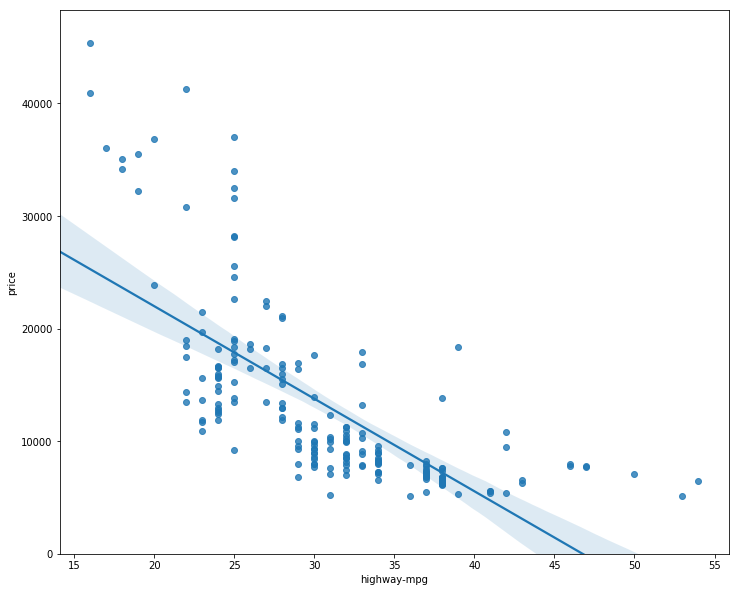

In [36]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=data)

plt.ylim(0,)

We can see from this plot that price is negatively correlated to highway-mpg, since the regression slope is negative. One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. This will give you a good indication of the variance of the data, and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data.

(0, 47422.919330307624)

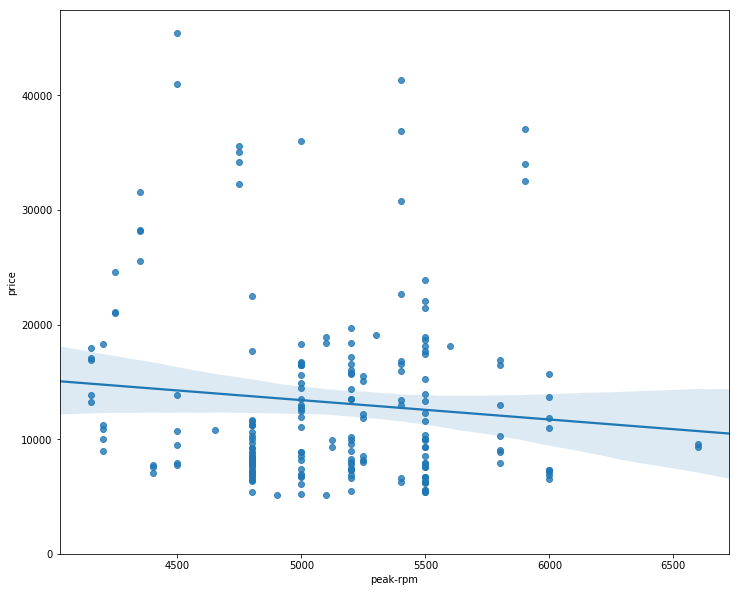

In [39]:
plt.figure(figsize=(width, height))
sns.regplot(x='peak-rpm', y='price', data=data)
plt.ylim(0,)

Comparing the regression plot of "peak-rpm" and "highway-mpg" we see that the points for "highway-mpg" are much closer to the generated line and on the average decrease. The points for "peak-rpm" have more spread around the predicted line, and it is much harder to determine if the points are decreasing or increasing as the "highway-mpg" increases.

In [43]:
data[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


In [ ]:
Residual Plot

What is a residual?

The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

So what is a residual plot?

A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

We look at the spread of the residuals:

- If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data. Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.

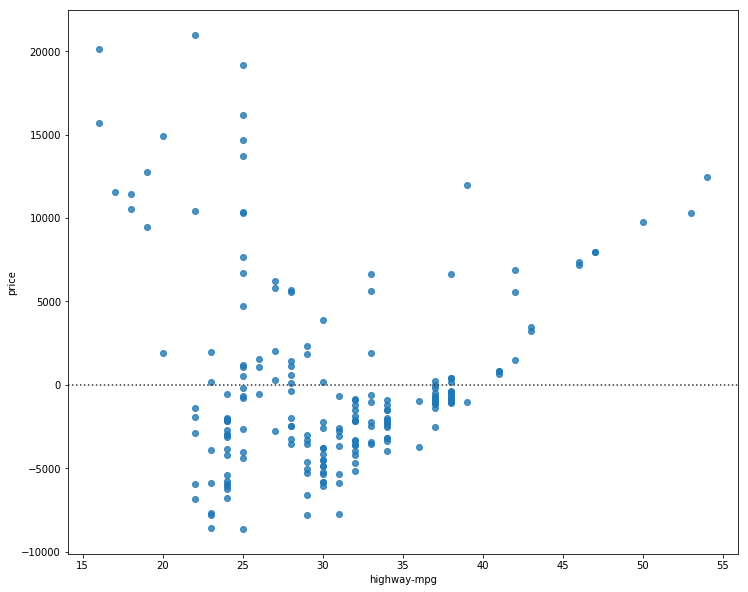

In [47]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(data['highway-mpg'], data['price'])
plt.show()

In [ ]:
We can see from this residual plot that the residuals are not randomly spread around the x-axis, which leads us to believe that maybe a non-linear model is more appropriate for this data.

In [ ]:
How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.

One way to look at the fit of the model is by looking at the distribution plot: We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

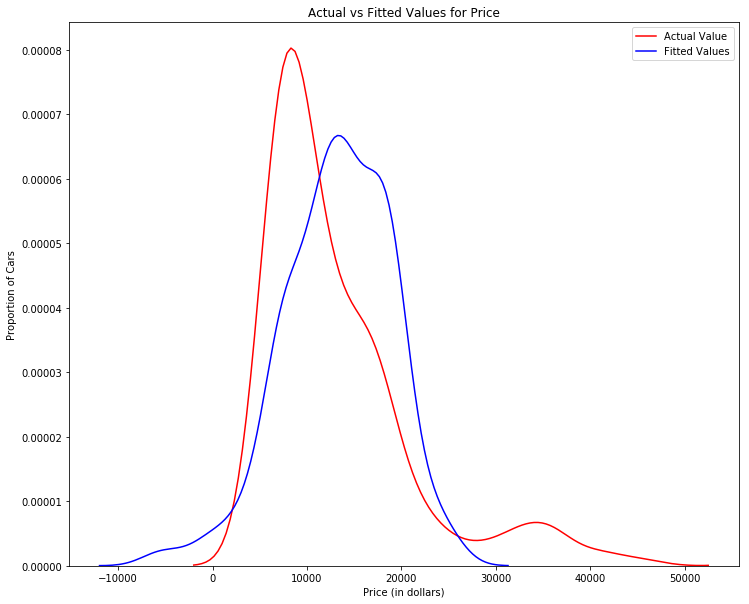

In [50]:
Y_hat = lm.predict(Z)

plt.figure(figsize=(width, height))


ax1 = sns.distplot(data['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [ ]:
We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.

## Polynomial Regression and Pipelines

Polynomial regression is a particular case of the general linear regression model or multiple linear regression models.

We saw earlier that a linear model did not provide the best fit while using highway-mpg as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


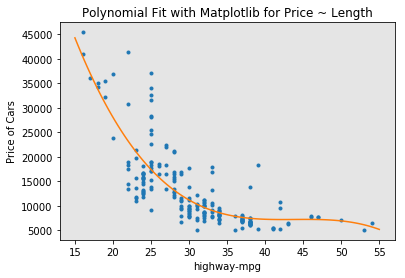

In [53]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()
    
x = data['highway-mpg']
y = data['price']

f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

PlotPolly(p, x, y, 'highway-mpg')

In [54]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [ ]:
We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function "hits" more of the data points.

In [ ]:
The analytical expression for Multivariate Polynomial function gets complicated. For example, the expression for a second-order (degree=2)polynomial with two variables is given by:
    
    𝑌ℎ𝑎𝑡=𝑎+𝑏1𝑋1+𝑏2𝑋2+𝑏3𝑋1𝑋2+𝑏4𝑋21+𝑏5𝑋22
 
We can perform a polynomial transform on multiple features. First, we import the module:

In [56]:
pr=PolynomialFeatures(degree=2)

pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [59]:
# The original data is of 201 samples and 4 features
Z_pr=pr.fit_transform(Z)

Z.shape

(201, 4)

In [ ]:
# after the transformation, there 201 samples and 15 features

Z_pr.shape

In [ ]:
## Measures for In-Sample Evaluation

In [ ]:
When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.

Two very important measures that are often used in Statistics to determine the accuracy of a model are:

R^2 / R-squared
Mean Squared Error (MSE)
R-squared

R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.

The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.

Mean Squared Error (MSE)

The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).

Model 1: Simple Linear Regression

In [60]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339175


We can say that ~ 49.659% of the variation of the price is explained by this simple linear model "horsepower_fit".

In [65]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

mse = mean_squared_error(data['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The output of the first four predicted value is:  [[16236.50464347]
 [16236.50464347]
 [17058.23802179]
 [13771.3045085 ]]
The mean square error of price and predicted value is:  31635042.944639895


Model 2: Multiple Linear Regression

In [69]:
# fit the model 
lm.fit(Z, data['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, data['price']))

The R-square is:  0.8093562806577457


In [ ]:
# We can say that ~ 80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".

In [72]:
Y_predict_multifit = lm.predict(Z)

print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(data['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


Model 3: Polynomial Fit

In [73]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.6741946663906513


In [ ]:
We can say that ~ 67.419 % of the variation of price is explained by this polynomial fit

In [75]:
mean_squared_error(data['price'], p(x))

20474146.42636125

## Prediction and Decision Making

we trained the model using the method fit. Now we will use the method predict to produce a prediction. Lets import pyplot for plotting; we will also be using some functions from numpy.

In [76]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [77]:
lm.fit(X, Y)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [78]:
yhat=lm.predict(new_input)
yhat[0:5]

array([[37601.57247984],
       [36779.83910151],
       [35958.10572319],
       [35136.37234487],
       [34314.63896655]])

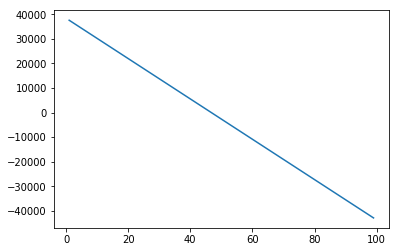

In [79]:
plt.plot(new_input, yhat)
plt.show()

In [ ]:
Decision Making: Determining a Good Model Fit
Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?

What is a good R-squared value?
When comparing models, the model with the higher R-squared value is a better fit for the data.

What is a good MSE?
When comparing models, the model with the smallest MSE value is a better fit for the data.

Let's take a look at the values for the different models.
Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.

R-squared: 0.49659118843391759
MSE: 3.16 x10^7
Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.

R-squared: 0.80896354913783497
MSE: 1.2 x10^7
Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.

R-squared: 0.6741946663906514
MSE: 2.05 x 10^7
Simple Linear Regression model (SLR) vs Multiple Linear Regression model (MLR)
Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and or even act as noise. As a result, you should always check the MSE and R^2.

So to be able to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.

MSEThe MSE of SLR is 3.16x10^7 while MLR has an MSE of 1.2 x10^7. The MSE of MLR is much smaller.
R-squared: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).
This R-squared in combination with the MSE show that MLR seems like the better model fit in this case, compared to SLR.

Simple Linear Model (SLR) vs Polynomial Fit
MSE: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.
R-squared: The R-squared for the Polyfit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.
Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting Price with Highway-mpg as a predictor variable.

Multiple Linear Regression (MLR) vs Polynomial Fit
MSE: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.
R-squared: The R-squared for the MLR is also much larger than for the Polynomial Fit.
Conclusion:
Comparing these three models, we conclude that the MLR model is the best model to be able to predict price from our dataset. This result makes sense, since we have 27 variables in total, and we know that more than one of those variables are potential predictors of the final car price.